In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
# create population density and covid case dataframes by county to merge
density_df = pd.read_excel('Population_Density.xlsm')
county_df = pd.read_csv('us-counties.csv')

In [3]:
#drop nan values to clean data
density_df = density_df.dropna(axis=1, how='all')

# density_df = density_df.set_index("FIPS")
density_df = density_df[density_df['State'] != 'NaN']

# delete duplicate df column
# del density_df['2019.1']
county_df = county_df.dropna()
# display density df
density_df
county_df['fips'] = county_df.fips.astype(int)
county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72056 entries, 0 to 72987
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    72056 non-null  object
 1   county  72056 non-null  object
 2   state   72056 non-null  object
 3   fips    72056 non-null  int64 
 4   cases   72056 non-null  int64 
 5   deaths  72056 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ MB


In [11]:
#display county df
density_df = density_df.set_index('FIPS Code')

In [12]:
#drop duplicate counties from df
final_counties = county_df.drop_duplicates(['county'], keep = 'last')

# visualize top counties (make sure this is actually working)
#final_counties = final_counties.sort_values(['cases'], ascending = False)

final_counties = final_counties.set_index('fips')

In [13]:
aggregate_data = final_counties.join(density_df, how = 'inner')

In [14]:
# aggregate_data.loc[aggregate_data.index.dropna()]

In [15]:
aggregate_data

,date,county,state,cases,deaths,State,Area,Units,2019
1001,2020-04-19,Autauga,Alabama,27,2,Alabama,Autauga County,Persons per square mile,93.53509
1001,2020-04-19,Autauga,Alabama,27,2,Alabama,Autauga County,Persons per square mile,93.53509
1011,2020-04-19,Bullock,Alabama,9,0,Alabama,Bullock County,Persons per square mile,16.27784
1011,2020-04-19,Bullock,Alabama,9,0,Alabama,Bullock County,Persons per square mile,16.27784
1021,2020-04-19,Chilton,Alabama,42,0,Alabama,Chilton County,Persons per square mile,63.72664
...,...,...,...,...,...,...,...,...,...
56039,2020-04-19,Teton,Wyoming,62,0,Wyoming,Teton County,Persons per square mile,5.77480
56041,2020-04-19,Uinta,Wyoming,6,0,Wyoming,Uinta County,Persons per square mile,9.75107
56041,2020-04-19,Uinta,Wyoming,6,0,Wyoming,Uinta County,Persons per square mile,9.75107
56043,2020-04-19,Washakie,Wyoming,4,0,Wyoming,Washakie County,Persons per square mile,3.52218


In [16]:
agg_data = aggregate_data.drop_duplicates(['county'], keep = 'last')

# wyoming = agg_data[agg_data['cases'] == 30013]

# agg_data[]

In [17]:
agg_data = agg_data.dropna()

agg_data[2019].min()

0.03659

In [21]:
agg_data.info()

cases_list = agg_data['cases'].to_list()

density_list = agg_data[2019].to_list()

correlation = stats.pearsonr(density_list,cases_list)

correlation

def regress(x_values,y_values):
    corr = stats.pearsonr(x_values,y_values)
    print(f'The correlation coefficient is {round(corr[0],2)}')
    print(f'The P Value is {corr[1]}')
    x_series = pd.Series(x_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_series * slope + intercept
    plt.plot(x_values, regress_values, 'r-')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 1001 to 56043
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1648 non-null   object 
 1   county  1648 non-null   object 
 2   state   1648 non-null   object 
 3   cases   1648 non-null   int64  
 4   deaths  1648 non-null   int64  
 5   State   1648 non-null   object 
 6   Area    1648 non-null   object 
 7   Units   1648 non-null   object 
 8   2019    1648 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 128.8+ KB


The correlation coefficient is 0.38
The P Value is 4.173629213245211e-59


Text(0.5, 1.0, 'Population Density vs Confirmed Cases Per County')

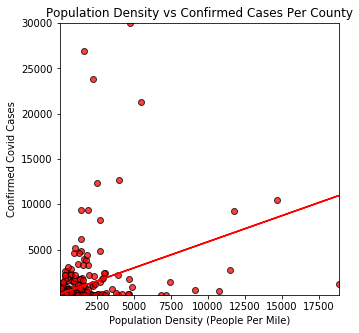

In [28]:
plt.figure(figsize=(5,5))

regress(density_list, cases_list)

plt.scatter(density_list, cases_list, marker="o", facecolors="red", edgecolors="black",
            alpha=.75)

plt.xlim((min(density_list), max(density_list)))
plt.ylim((min(cases_list), max(cases_list)))

plt.xlabel('Population Density (People Per Mile)')
plt.ylabel('Confirmed Covid Cases')
plt.title('Population Density vs Confirmed Cases Per County')

#### 